<a href="https://colab.research.google.com/github/Gayathri-krishna-2004/OutriX_tasks/blob/main/Outrix_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORATORY DATA ANALYSIS ON E-COMMERCE DATA


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_theme(style="whitegrid")

# Add 'sep' parameter to specify comma delimiter and low_memory=False to handle potential formatting issues
df = pd.read_csv("Amazon Sale Report.csv", sep=',', low_memory=False)


# Drop unnecessary columns
columns_to_drop = ['index', 'Unnamed: 22', 'promotion-ids', 'fulfilled-by']
df = df.drop(columns=columns_to_drop)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# Drop rows with missing Amount or Qty
df = df.dropna(subset=['Amount', 'Qty'])

# Fill other missing values
df['Courier Status'].fillna('Unknown', inplace=True)
df['currency'].fillna('INR', inplace=True)
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)

# Add Total Sales column
df['Total Sales'] = df['Qty'] * df['Amount']

/tmp/ipython-input-9-2759030165.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier Status'].fillna('Unknown', inplace=True)
/tmp/ipython-input-9-2759030165.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

#📊 Visualization & Insights




*1. Order Status Distribution*

/tmp/ipython-input-10-2781347600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index, palette='Set2')


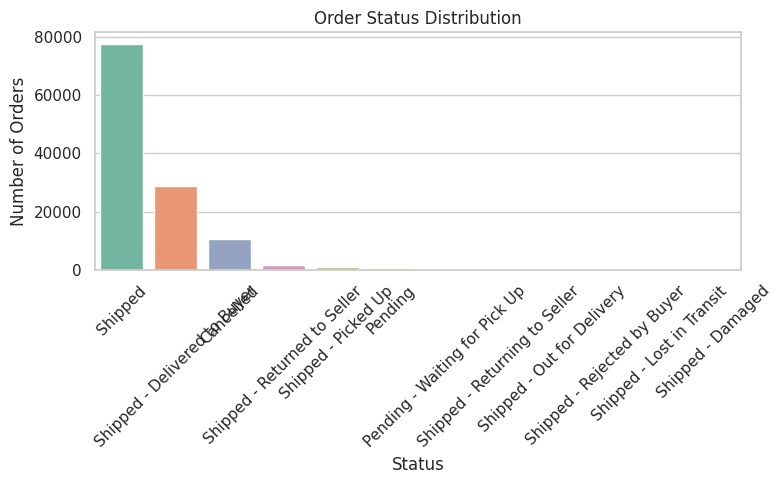

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index, palette='Set2')
plt.title("Order Status Distribution")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*2. Top 10 Product Categories by Total Sales*

/tmp/ipython-input-11-2206447673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set3')


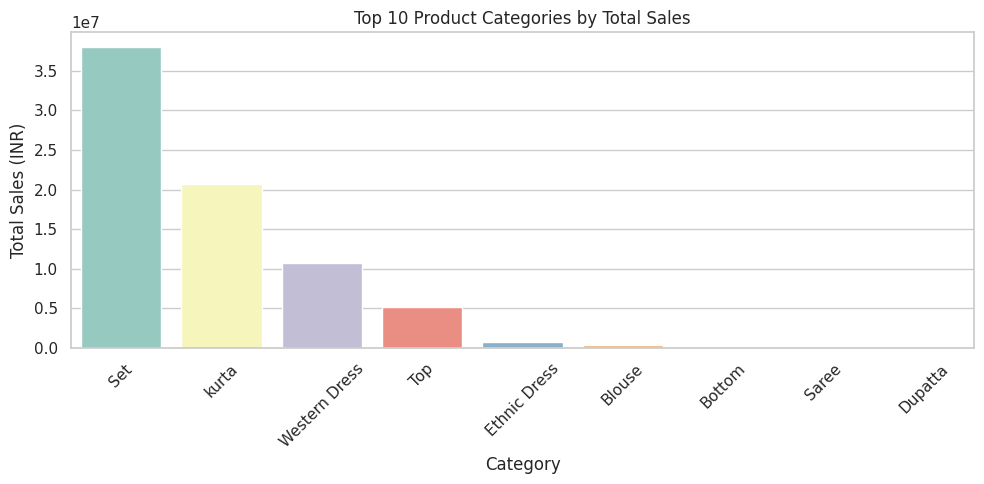

In [ ]:
top_categories = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='Set3')
plt.title("Top 10 Product Categories by Total Sales")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*3. Monthly Sales Trend*

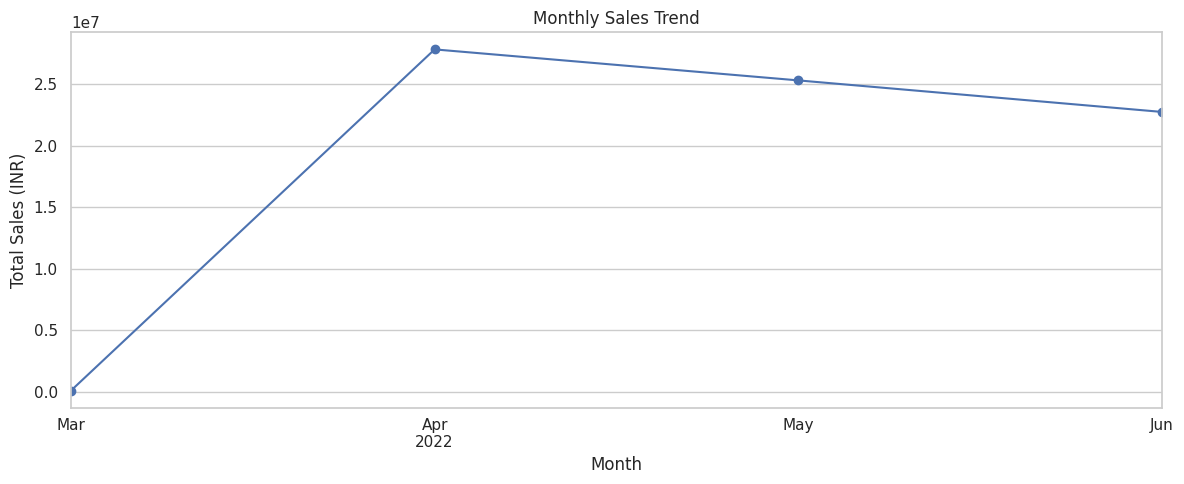

In [ ]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Sales'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (INR)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

*4. Top 10 Shipping States by Number of Orders*

/tmp/ipython-input-13-410101758.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


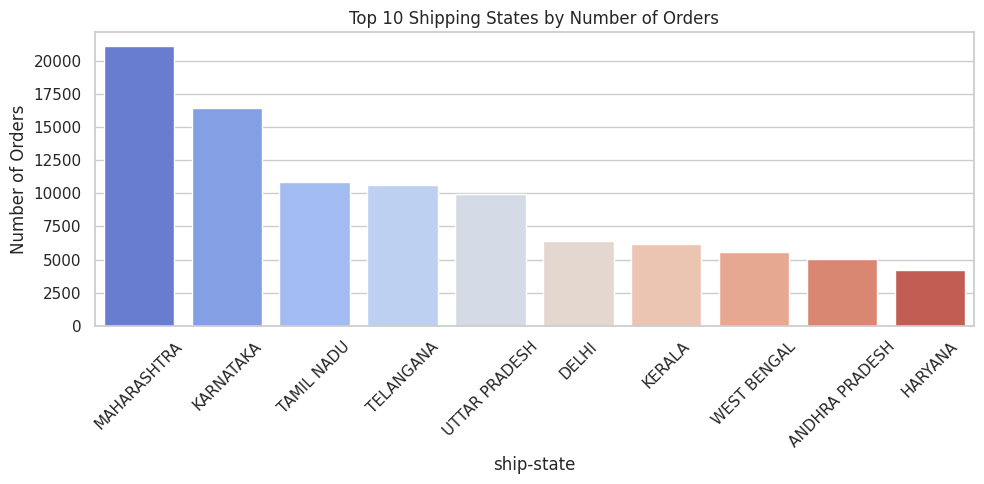

In [ ]:
top_states = df['ship-state'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title("Top 10 Shipping States by Number of Orders")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*5. B2B vs Regular Orders*

/tmp/ipython-input-14-4001812253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='B2B', data=df, palette='muted')


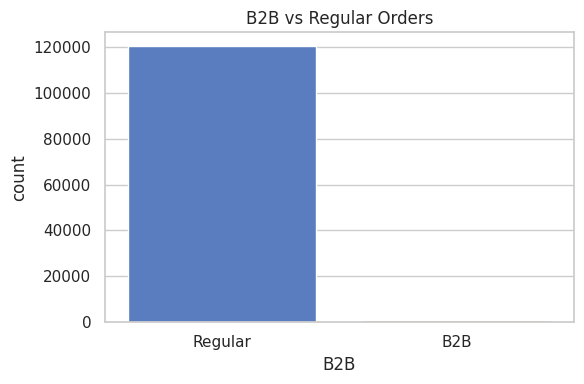

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='B2B', data=df, palette='muted')
plt.title("B2B vs Regular Orders")
plt.xticks([0, 1], ['Regular', 'B2B'])
plt.tight_layout()
plt.show()

*6. Courier Status Distribution*

/tmp/ipython-input-15-3670566790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_courier_status.index, y=top_courier_status.values, palette='pastel')


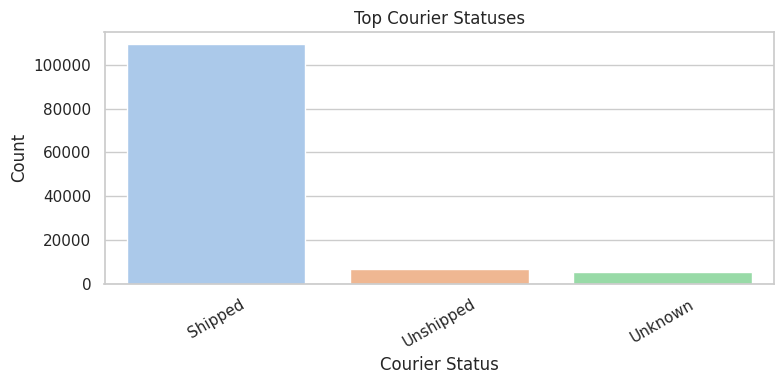

In [ ]:
plt.figure(figsize=(8,4))
top_courier_status = df['Courier Status'].value_counts().head(5)
sns.barplot(x=top_courier_status.index, y=top_courier_status.values, palette='pastel')
plt.title("Top Courier Statuses")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()